# Cold gas phase

In [1]:
import os
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


$$ \Sigma_{SO_4} = \dfrac{6.1}{M_{\odot} pc^{-2}} f_g^{0.3}\left(\dfrac{Z}{0.1 Z_{\odot}}\right)^{-0.3} \left(\dfrac{I}{10^6 cm^{-2}s^{-1}}\right)^{0.23} $$

$$f_g = \dfrac{\Sigma_{gas}}{\Sigma_{gas}+\Sigma_{star}}$$

$$I = 10^6 cm^{-2}s^{-1}\left(\dfrac{\Sigma_{SFR}}{5\cdot 10^4 M_{\odot} yr^{-1} pc^{-2}}\right) $$

In [18]:
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [36]:
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
Z = 8.5

In [37]:
cold_phase = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)   

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


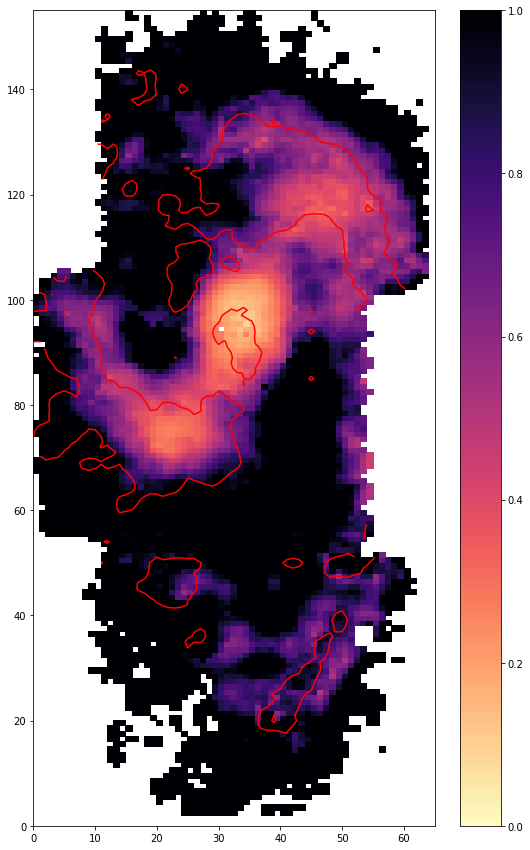

In [39]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.03,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax = 1)
plt.colorbar()